<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Parametric_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std



In [2]:
# seed the random number generator
seed(1)

# generate sets of univariate observations
data1 = 10 * np.random.randn(1000) + 95
data2 = 10 * np.random.randn(1000) + 96
data3 = 10 * np.random.randn(1000) + 96


# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
print('data3: mean=%.3f stdv=%.3f' % (mean(data3), std(data3)))

data1: mean=95.388 stdv=9.810
data2: mean=96.273 stdv=10.300
data3: mean=95.778 stdv=9.716


## Student’s t-Test

In [3]:
from scipy.stats import ttest_ind

# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Mean of the each group is the same (fail to reject H0)')
else:
	print('Mean of the each group is different (reject H0)')

Statistics=-1.967, p=0.049
Mean of the each group is different (reject H0)


##Paired Student’s t-Test

In [4]:
from scipy.stats import ttest_rel


# compare samples
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Mean of the each group is the same (fail to reject H0)')
else:
	print('Mean of the each group is different  (reject H0)')

Statistics=-1.989, p=0.047
Mean of the each group is different  (reject H0)


##Analysis of Variance Test

In [5]:
# ANOVA testing allow us to work with more than two groups
from scipy.stats import f_oneway

# compare samples
stat, p = f_oneway(data1, data2, data3)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('all means are the same (fail to reject H0)')
else:
	print('At least mean of the one group is different (reject H0)')

Statistics=1.987, p=0.13723
all means are the same (fail to reject H0)


##Coffee Chain Data set

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df = pd.read_table(
    "/content/drive/MyDrive/Colab Notebooks/Machine Learning /Coffee Chain.txt",  sep='\t')

df.head(4)

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,记录数,Product Line,Product Type,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,2012-10-01 00:00:00.000,503,71,Major Market,Central,46,1,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,2012-10-01 00:00:00.000,405,71,Major Market,Central,17,1,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,2012-10-01 00:00:00.000,419,64,Major Market,South,13,1,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,2012-10-01 00:00:00.000,871,56,Major Market,East,10,1,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular


In [17]:
df.nunique()

Area Code                                      149
Cogs                                           100
Difference Between Actual and Target Profit    200
Date                                             6
Inventory                                      205
Margin                                         140
Market Size                                      2
Market                                           4
Marketing                                       67
记录数                                              1
Product Line                                     2
Product Type                                     4
Product                                         13
Profit                                         238
Sales                                          243
State                                           20
Target COGS                                     37
Target Margin                                   56
Target Profit                                   50
Target Sales                   

In [ ]:
# Note that in order for us to implement  ANOVA testing for the feature reduction, our target column should be continous and predictor variablaes should be category.
# Therefore, I will use Date, Market Size, MArket, Product Line, Product Type as my predictor variables, and Profit as my target(response variable.) 

In [49]:
newdf = df[['Date', 'Market Size', 'Market', 'Product Line', 'Product Type','Profit']]
newdf.head()

,Date,Market Size,Market,Product Line,Product Type,Profit
0,2012-10-01 00:00:00.000,Major Market,Central,Leaves,Herbal Tea,-5
1,2012-10-01 00:00:00.000,Major Market,Central,Leaves,Herbal Tea,26
2,2012-10-01 00:00:00.000,Major Market,South,Leaves,Herbal Tea,28
3,2012-10-01 00:00:00.000,Major Market,East,Leaves,Tea,35
4,2012-10-01 00:00:00.000,Major Market,West,Leaves,Tea,56


In [50]:
def convert_cat(x):
  for col in x.columns:
    x[col] = x[col].astype('category')

convert_cat(newdf[::-1])

In [51]:
newdf.dtypes

Date            object
Market Size     object
Market          object
Product Line    object
Product Type    object
Profit           int64
dtype: object

In [52]:
#Encoding
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for col in newdf[::-1]:
  newdf[col] = encoder.fit_transform(newdf[col])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
newdf.head()

,Date,Market Size,Market,Product Line,Product Type,Profit
0,0,0,0,1,2,47
1,0,0,0,1,2,77
2,0,0,2,1,2,79
3,0,0,1,1,3,86
4,0,0,3,1,3,105


In [55]:
X= newdf.iloc[:,0:5]
y= newdf.iloc[:,5]
X.head()

,Date,Market Size,Market,Product Line,Product Type
0,0,0,0,1,2
1,0,0,0,1,2
2,0,0,2,1,2
3,0,0,1,1,3
4,0,0,3,1,3


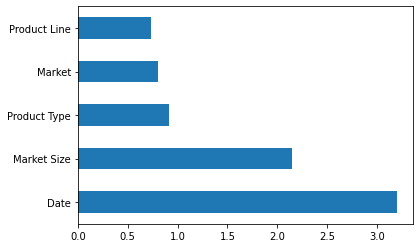

In [56]:
# ANOVA testing for the feature selection
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=f_classif, k='all') 
fit = test.fit(X, y)
fit.scores_

%matplotlib inline
import matplotlib.pyplot as plt

imp = pd.Series(fit.scores_, index= X.columns)
imp.nlargest(5).plot(kind="barh")
plt.show()



